In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv("C:/Users/Meli/Desktop/Ironhack/Lab1/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [13]:
df.tail(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443641,2828582,B07JM93SCC,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
2443642,2828585,B07DCFQMQL,Speed MaxX BODY ARMOUR CE MOTORBIKE/MOTORCYCLE...,3.6,66,49.99,False,0,Motorbike Clothing
2443643,2828586,B07JM5VQFX,Motorcycle Clothing Suit - Motorbike Suit With...,4.1,5,158.99,False,0,Motorbike Clothing
2443644,2828587,B07X98JLFF,GREAT BIKERS GEAR - Bobber Cafe Brat Style Lea...,3.6,12,14.99,False,0,Motorbike Clothing
2443645,2828588,B0BQMXJPP5,Helmet Ponytail Pigtails Twist Braids Hair wit...,0.0,0,19.99,False,0,Motorbike Clothing
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing
2443650,2828593,B08P3W9B3T,RIDEX CJ223 Motorcycle Motorbike Jacket Armour...,4.5,34,53.99,False,0,Motorbike Clothing


In [10]:
df.shape

(2443651, 9)

In [29]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [14]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [27]:
# change scientific notation to two decimals
pd.options.display.float_format = '{:20,.2f}'.format

In [28]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,"2,443,651.00","2,443,651.00","2,443,651.00","2,443,651.00","2,443,651.00"
mean,"1,370,545.35",2.15,480.63,89.24,25.90
std,"816,056.17",2.19,"5,944.12",345.61,240.48
min,1.00,0.00,0.00,0.00,0.00
25%,"658,921.50",0.00,0.00,9.99,0.00
50%,"1,349,029.00",0.00,0.00,19.09,0.00
75%,"2,060,685.50",4.40,59.00,45.99,0.00
max,"2,828,593.00",5.00,"1,356,658.00","100,000.00","50,000.00"


In [15]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('bool'), dtype('float64'), dtype('int64'), dtype('O')]

In [16]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [17]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [18]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [19]:
# Retrieving column names with object (typically string) data types from the dataframe
df.select_dtypes("object").columns

Index(['asin', 'title', 'category'], dtype='object')

In [21]:
# Counting and sorting the unique values for each object (string) column in descending order
df.select_dtypes("object").nunique().sort_values(ascending=False)


asin        2222742
title       2077591
category        296
dtype: int64

In [22]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [23]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

False

# Data Cleaning## 
Checking for Missing Data¶

In [24]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

# Part 1: Understanding Product Categories

## Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
## 
Frequency Tables:## 

Generate a frequency table for the product category.

In [40]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts()
frequency_table
# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True)
proportion_table

category
Sports & Outdoors                                        0.34
Beauty                                                   0.01
Handmade Clothing, Shoes & Accessories                   0.01
Bath & Body                                              0.01
Birthday Gifts                                           0.01
                                                 ...         
Alexa Built-In Devices                                   0.00
Motorbike Chassis                                        0.00
Plugs                                                    0.00
Smart Home Security & Lighting                           0.00
Smart Speakers                                           0.00
Name: proportion, Length: 296, dtype: float64

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                                        0.34
 Beauty                                                   0.01
 Handmade Clothing, Shoes & Accessories                   0.01
 Bath & Body                                              0.01
 Birthday Gifts                                           0.01
                                                  ...         
 Alexa Buil

In [41]:
my_table = pd.crosstab(index = df_categorical["category"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


## Which are the top 5 most listed product categories?

In [42]:
# Top 5 most listed product categories
top_5_categories = frequency_table.nlargest(5)

# Display the result
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

## Visualizations:
## 
Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

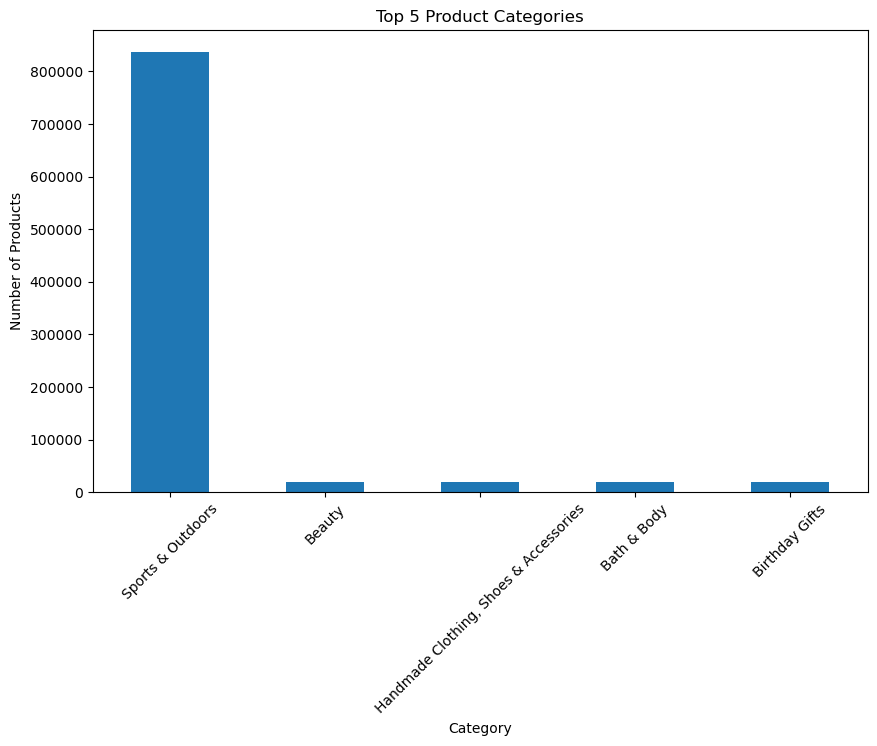

In [46]:
top_n = 5  # Number of top categories to plot
top_categories = frequency_table.nlargest(top_n)

# Plotting the distribution for top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title(f'Top {top_n} Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

## For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

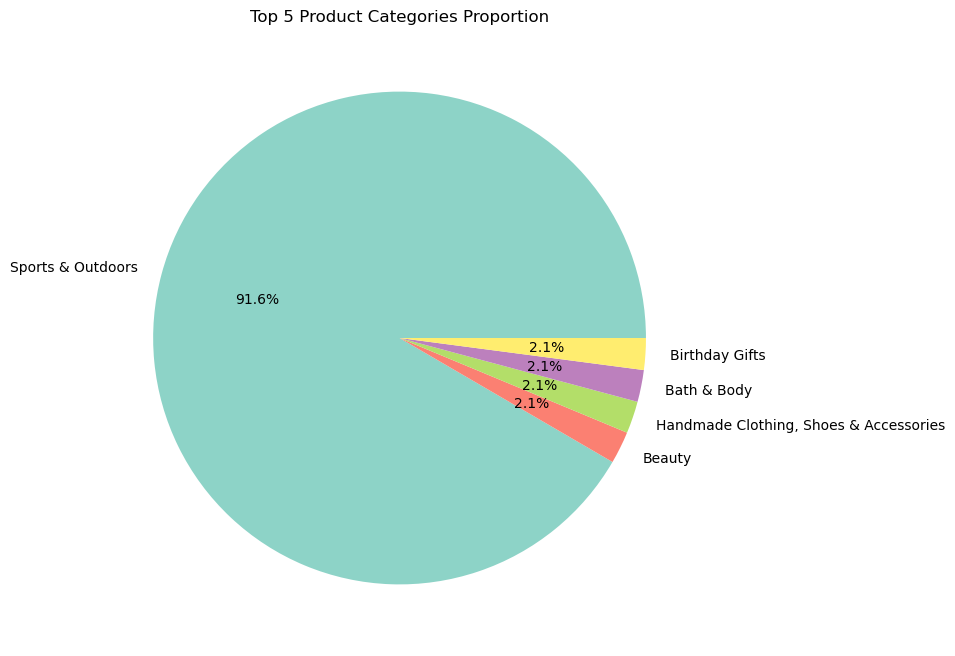

In [51]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts()

# Selecting the top categories
top_n = 5  # Number of top categories to visualize
top_categories = frequency_table.nlargest(top_n)

# Plotting a pie chart for the top categories
plt.figure(figsize=(8, 8))
top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=0, cmap='Set3')
plt.title(f'Top {top_n} Product Categories Proportion')
plt.ylabel('')  # Hide the y-label
plt.show()


## Part 2: Delving into Product Pricing## 
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.

In [52]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,"2,443,651.00","2,443,651.00","2,443,651.00","2,443,651.00","2,443,651.00"
mean,"1,370,545.35",2.15,480.63,89.24,25.90
std,"816,056.17",2.19,"5,944.12",345.61,240.48
min,1.00,0.00,0.00,0.00,0.00
25%,"658,921.50",0.00,0.00,9.99,0.00
50%,"1,349,029.00",0.00,0.00,19.09,0.00
75%,"2,060,685.50",4.40,59.00,45.99,0.00
max,"2,828,593.00",5.00,"1,356,658.00","100,000.00","50,000.00"


In [63]:
mean_price = df['price'].mean()  # Computes the mean of the selected column
median_price = df['price'].median()  # Calculates the median of the selected column
mode_price = df['price'].mode()[0]  # Identifies the mode of the selected column

mean_price.round(2), median_price, mode_price

(89.24, 19.09, 9.99)

# What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [64]:
mean_price = df['price'].mean()  # Computes the mean of the selected column
mode_price = df['price'].mode()[0]  # Identifies the mode of the selected column

mean_price.round(2), mode_price

(89.24, 9.99)

In [ ]:
# mean is the average and the mode is the most repaeted price, it´s the pike in the visualization.

## Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?


In [68]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25                   9.99
 0.50                  19.09
 0.75                  45.99
 Name: price, dtype: float64)

## Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

C:\Users\Meli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


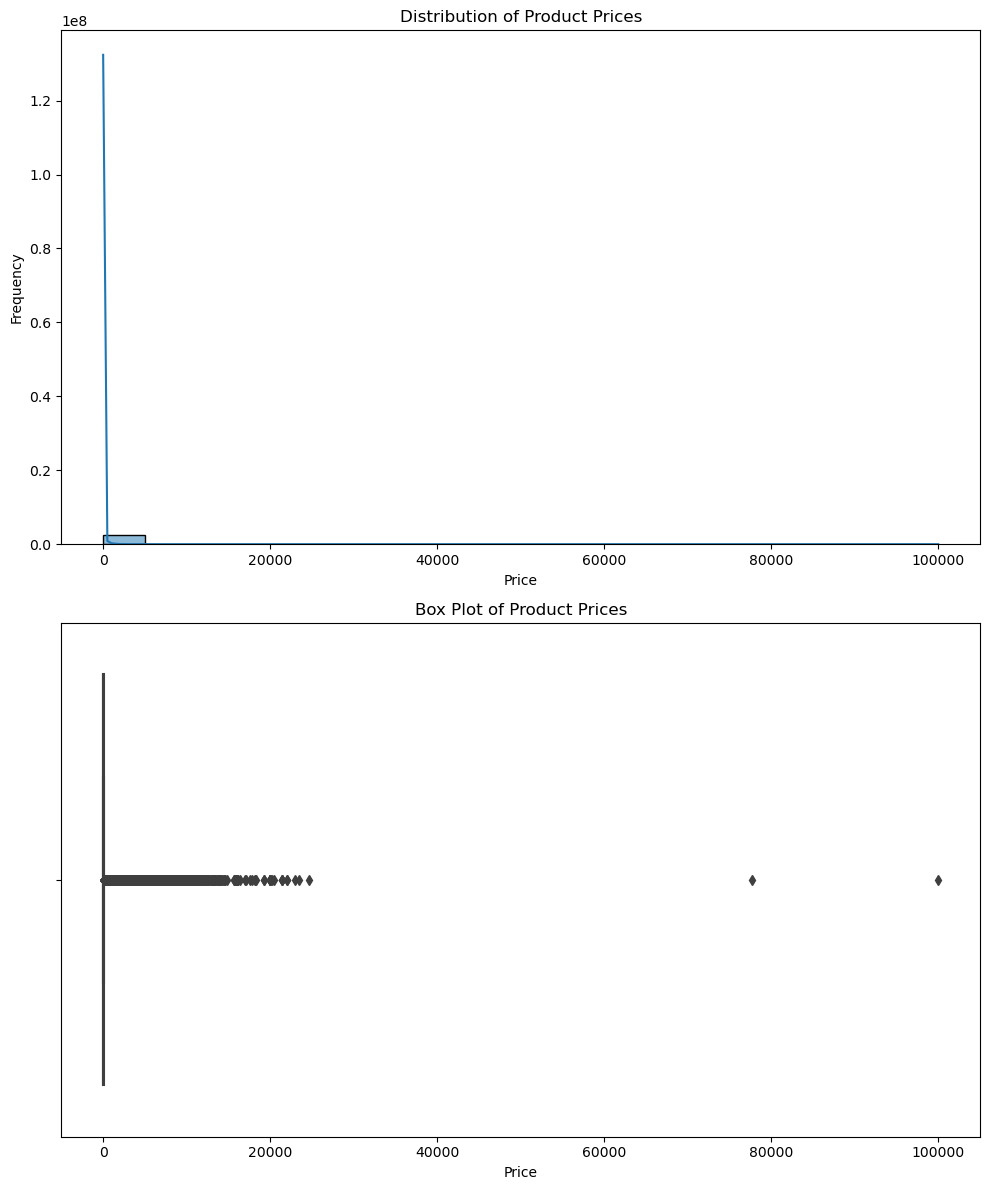

In [70]:
# Set up the figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot histogram of product prices
sns.histplot(df['price'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Product Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot box plot of product prices
sns.boxplot(x=df['price'], ax=axes[1])
axes[1].set_title('Box Plot of Product Prices')
axes[1].set_xlabel('Price')

# Show the plots
plt.tight_layout()
plt.show()

## Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [71]:
mean_price = df['stars'].mean()  # Computes the mean of the selected column
median_price = df['stars'].median()  # Calculates the median of the selected column
mode_price = df['stars'].mode()[0]  # Identifies the mode of the selected column

mean_price.round(2), median_price, mode_price

(2.15, 0.0, 0.0)

## Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [72]:
variance_price = df['stars'].var()
std_dev_price = df['stars'].std()
min_price = df['stars'].min()
max_price = df['stars'].max()
range_price = max_price - min_price
quantiles_price = df['stars'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25                   0.00
 0.50                   0.00
 0.75                   4.40
 Name: stars, dtype: float64)

In [ ]:
# STD is 2.19 the variation is not that much

## Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [73]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

In [75]:
## The positive value of skewness (0.8) for the 'SalePrice' indicates that the distribution is right-skewed. 
## This means that the tail on the right side (higher ratings) is longer than the left side (lower ratings).
## Negative kurtosis (<0): Indicates a distribution with lighter tails and a flatter peak than a normal distribution. Such distributions have fewer outliers.

# Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

C:\Users\Meli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


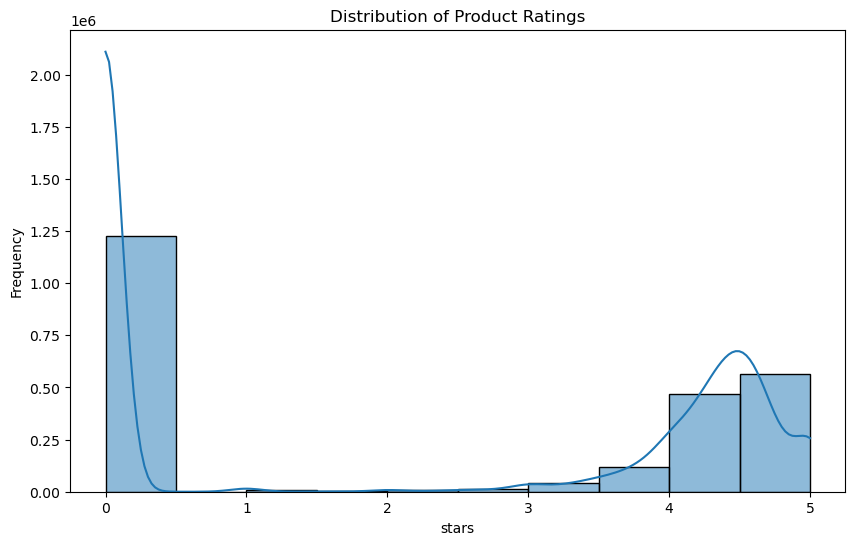

In [76]:
# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=10, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 0 stars is the most common rating.